In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

/kaggle/input/college-major-data/college-major-data.csv


In [72]:
plt.style.use('dark_background')

Question: Of the majors that start with the letter 'G', which ones have the lowest unemployment rate? How does that compare to the industry(Major_category) average unemployment rate?

* First we have to access our csv and establish a database and db connection using pandas and sqlite
* Then we will make a dataframe with just each Major, Major_category, and Unemployment rate
* Then we will create a dataframe that contains only majors that start with the letter 'g' and includes their Major_category

* Next we will create dataframes for each represented major_category using Pandas. We will plot the dataframes together on the same graph(using different colors for each category) and Major_category average will be shown in a different shade for each represented Major_category.

In [73]:
majors = pd.read_csv('/kaggle/input/college-major-data/college-major-data.csv')
majors[:3]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0


In [74]:
conn = sqlite3.connect('college-major-data.db')
majors.to_sql('majors', conn, if_exists = 'replace', index = False)

In [75]:
qry = """
SELECT LOWER(Major) as 'Major',Major_category, Total, Unemployment_rate from majors
ORDER BY Total DESC
"""
un_df = pd.read_sql(qry, conn)
un_df.set_index('Major')
list_un = [i.lower() for i in (un_df['Major']).tolist()]
#un_df

,Major,Major_category,Total,Unemployment_rate
0,business management and administration,Business,3123510,0.058865
1,general business,Business,2148712,0.051378
2,accounting,Business,1779219,0.053415
3,nursing,Health,1769892,0.026797
4,psychology,Psychology & Social Work,1484075,0.069667
...,...,...,...,...
168,pharmacology,Biology & Life Science,5015,0.016111
169,astronomy and astrophysics,Physical Sciences,4700,0.086022
170,military technologies,Industrial Arts & Consumer Services,4315,0.101796
171,educational administration and supervision,Education,4037,0.000000


In [ ]:
un_cat_dict = {}
for c in cat_set_g:
    avg = (un_df[un_df['Major_category'] == c]).mean()
    un_cat_dict[c] = avg['Unemployment_rate']
un_cat_df = pd.DataFrame(un_cat_dict, index = [0])
cat_dict = {'Avg_Unemployment_rate':[]}
cat_dict['Avg_Unemployment_rate'] = (un_cat_dict)
cat_df = pd.DataFrame(cat_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0.0, 0, 'business management and administration'),
 Text(0.01, 0, 'general business'),
 Text(0.02, 0, 'accounting'),
 Text(0.03, 0, 'nursing'),
 Text(0.04, 0, 'psychology'),
 Text(0.05, 0, ''),
 Text(0.06, 0, ''),
 Text(0.07, 0, ''),
 Text(0.08, 0, '')]

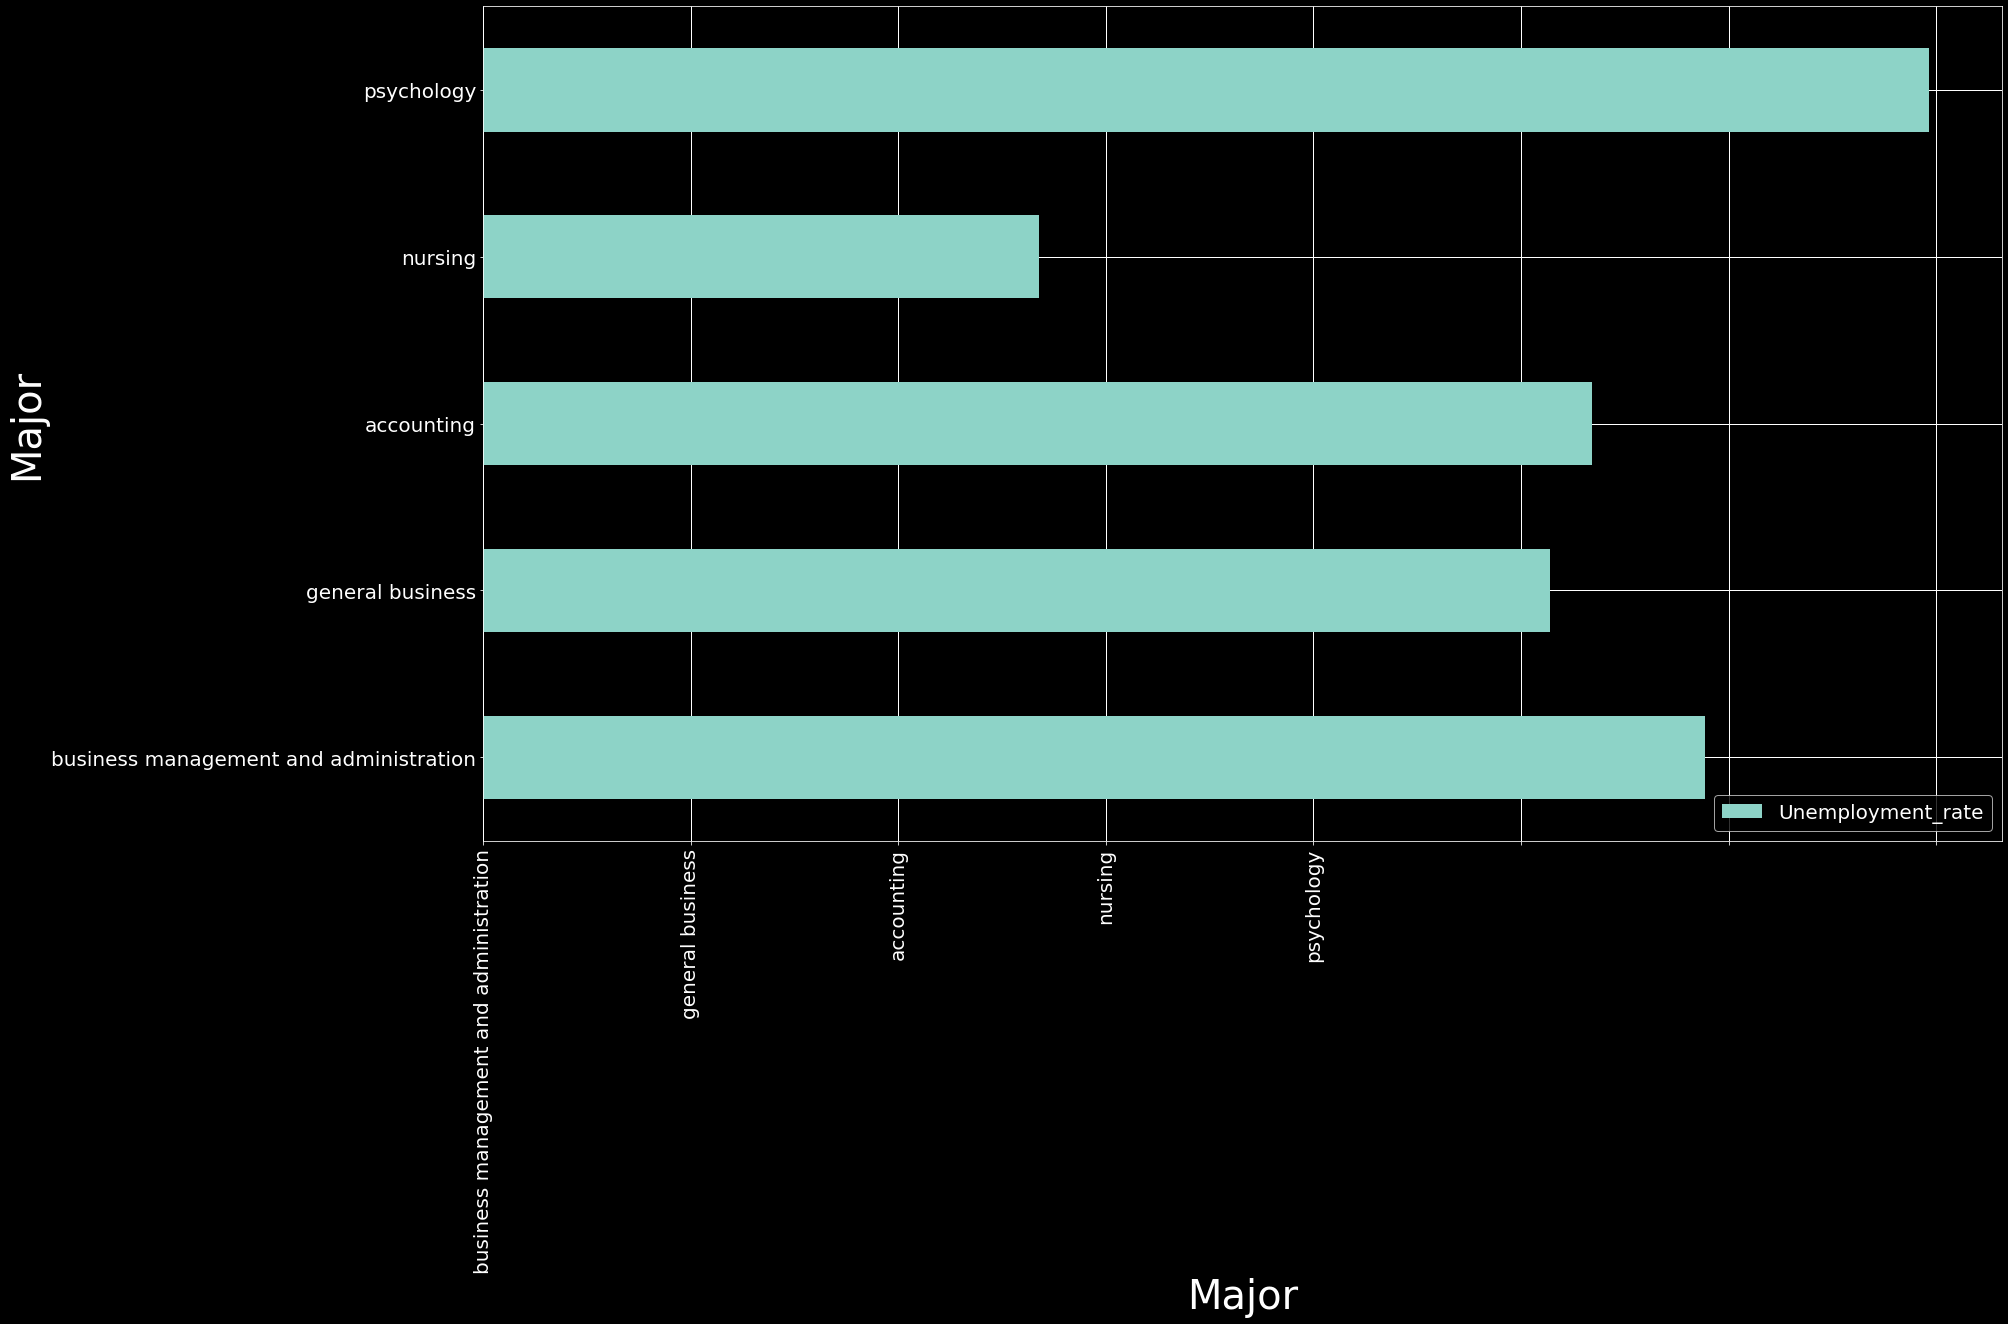

In [263]:
ax = un_df[:5].plot.barh(x = 'Major', y = 'Unemployment_rate')
ax.set_xlabel('Major')
ax.set_xticklabels(labels = list_un[:5], rotation = 90)

In [78]:
g_df = un_df[un_df['Major'].str[0] == 'g']
list_g = [i.lower() for i in (g_df['Major']).tolist()]
#g_df

In [79]:
cat_set_g = (set([i for i in (g_df['Major_category']).tolist()]))
#cat_set_g

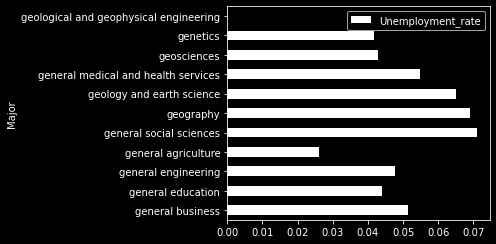

In [87]:
ax = g_df.plot.barh(x = 'Major', y = 'Unemployment_rate', color = 'white', stacked = True)

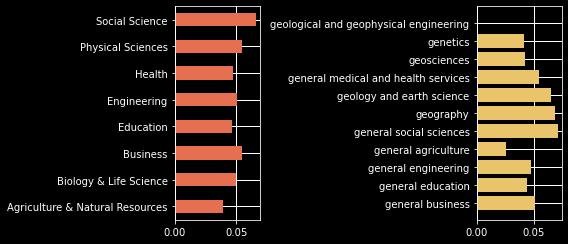

In [213]:
fig, axs = plt.subplots(nrows=1, ncols=2)
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#add data to plots
cat_df.plot.barh(legend = False, color = '#E76F51', ax=axs[0])
#axs[0].plot(cat_df, cat_df)
axs[1].barh(g_df['Major'], g_df['Unemployment_rate'], color = '#E9C46A')

plt.show()

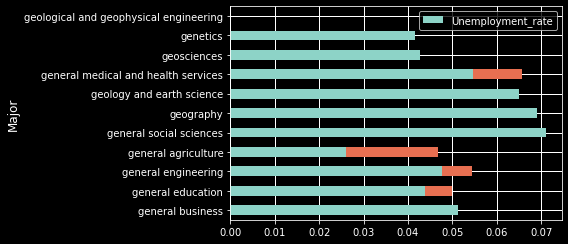

In [214]:
#fig, axs = plt.subplots(nrows=1, ncols=2)
plt.rcParams["figure.figsize"] = [8.00, 3.50]

ax = cat_df.plot.barh(legend = False, color = '#E76F51')
g_df.plot.barh(x = 'Major', y = 'Unemployment_rate', ax = ax)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(0.0, 0, '0%'),
 Text(0.02, 0, '1%'),
 Text(0.04, 0, '2%'),
 Text(0.06, 0, '3%'),
 Text(0.08, 0, '4%')]

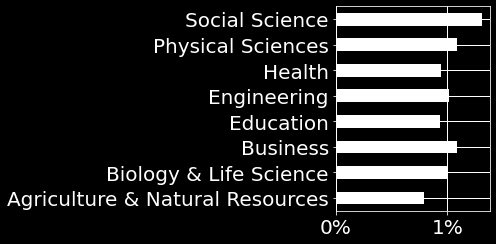

In [265]:
plt.rcParams["figure.autolayout"] = True
#color1 => #264653
colors = ['#FFFFFF', '#287271','#2A9D8F', '#E9C46A', '#EFB366', '#F4A261', '#EE8959', '#E76F51']
ax = cat_df.plot.barh(color = colors, legend = False)
ax.set_xticklabels(labels = ('0%','1%','2%','3%','4%','5%','6%'))

In [208]:
g_df

,Major,Major_category,Total,Unemployment_rate
1,general business,Business,2148712,0.051378
6,general education,Education,1438867,0.043904
23,general engineering,Engineering,503080,0.047688
59,general agriculture,Agriculture & Natural Resources,128148,0.026147
60,general social sciences,Social Science,127363,0.071057
64,geography,Social Science,115423,0.069008
66,geology and earth science,Physical Sciences,107902,0.065111
68,general medical and health services,Health,104516,0.054701
160,geosciences,Physical Sciences,8267,0.042792
166,genetics,Biology & Life Science,6362,0.041591


In [217]:
cat_df

,Avg_Unemployment_rate
Agriculture & Natural Resources,0.039569
Biology & Life Science,0.049936
Business,0.054496
Education,0.046762
Engineering,0.050630
Health,0.047209
Physical Sciences,0.054541
Social Science,0.065686


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


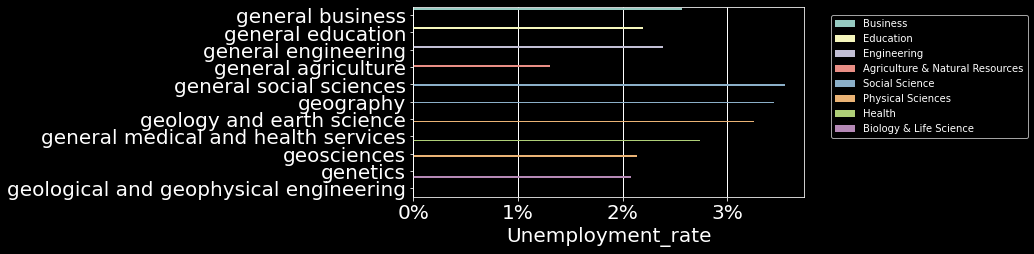

In [286]:
plt.rcParams["figure.autolayout"] = True
#plt.rcParams["figure.figsize"] = [28.00, 18.50]
plt.rc('axes', labelsize= 20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize= 10)

ax = sns.barplot(x = 'Unemployment_rate', y = 'Major', hue = 'Major_category', data = g_df)
ax.set(ylabel = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.8)
#plt.xlabel(label = 'Unemployment rate')
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
ax.set_xticklabels(labels = ('0%','1%','2%','3%','4%','5%','6%'))
plt.savefig('g_majors.png')